In [3]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [5]:
train = pd.read_csv("/content/drive/MyDrive/CODING_DOJO/CÓDIGO/SEMANA FINAL/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/MyDrive/CODING_DOJO/CÓDIGO/SEMANA FINAL/fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = train.drop(columns = 'label')/255
X_test = test.drop(columns = 'label')/255
y_train = train['label']
y_test = test['label']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1234)

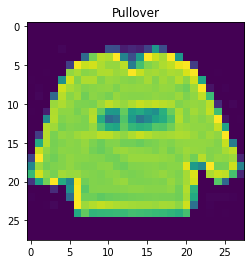

In [8]:
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

plt.imshow(np.array(X_train.loc[0, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[0]]));

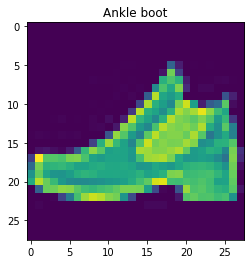

In [9]:
plt.imshow(np.array(X_train.loc[1, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[1]]));

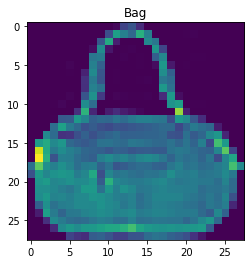

In [10]:
plt.imshow(np.array(X_train.loc[20, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[20]]));

In [11]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_val = np.array(X_val).reshape(X_val.shape[0], 28, 28, 1)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

In [13]:
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [14]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [15]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
model.add(Conv2D(filters = 8, # How many filters you want to use
                 kernel_size = 3, # size of each filter
                 activation = 'relu',
                 input_shape = input_shape)) # What is the shape of your input features (we defined this above)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Size of pooling
Dropout(0.2)
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, # How many output possibilities we have
                activation = 'softmax')) # What activation function are you using

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [17]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),                  
                    epochs=2)

Epoch 1/2
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5401 - acc: 0.8133 - val_loss: 0.4002 - val_acc: 0.8576
Epoch 2/2
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3730 - acc: 0.8673 - val_loss: 0.3625 - val_acc: 0.8677


In [18]:
# get predictions for testing data
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

# could use .predict_classes, but it is deprecated so I will use .predict with argmax
# preds = model.predict_classes(X_test)
preds = np.argmax(model.predict(X_test), axis=-1)

In [19]:
accuracy_score(y_test, preds)

0.876